# **Data Preprocessing**

## *Import libraries*

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import cv2
import pandas as pd
from PIL import Image
from glob import glob
import random

import torch
import torchvision
import torchvision.transforms as transforms

import torch.optim as optim
import os
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
import torchvision.models as models
import torch.nn as nn


from torch.utils.tensorboard import SummaryWriter

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## *Data overview*

In [3]:
# Number of images

animals_list = os.listdir("D:/pythonProject/project1/animal/")
animals_file_list = []
total = 0
for i in range(len(animals_list)):
  animals_file_list.append(os.listdir(str("D:/pythonProject/project1/animal/" + animals_list[i])))
  n = len(animals_file_list[i])
  total+=n
  print(animals_list[i],":" ,n, 'images.')
print('Total:',total,'images.')

bee : 2531 images.
butterfly : 3489 images.
cat : 4384 images.
chicken : 3098 images.
cow : 2130 images.
dog : 4937 images.
eagle : 2504 images.
elephant : 3047 images.
horse : 3023 images.
human : 3817 images.
lion : 2513 images.
lizard : 2597 images.
monkey : 2049 images.
panther : 2772 images.
shark : 2244 images.
sheep : 2800 images.
spider : 4819 images.
squirrel : 3087 images.
tiger : 2882 images.
turtle : 2184 images.
Total: 60907 images.


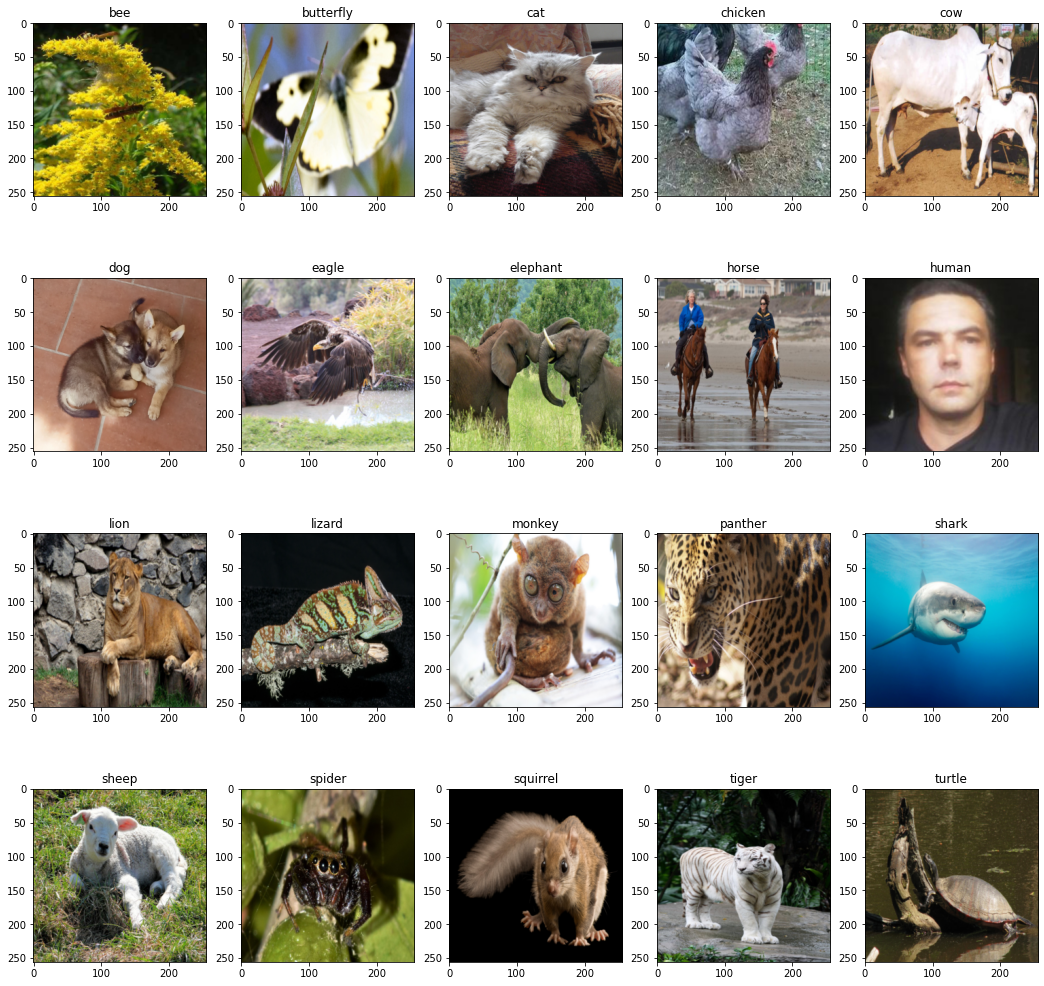

In [4]:
#Show some images

fig=plt.figure(figsize=(18,18))
columns = 5
rows = 4

for i in range(len(animals_list)):
    img = mpimg.imread(str("D:/pythonProject/project1/animal/"+ animals_list[i] + "/"+ animals_file_list[i][np.random.randint(0,len(animals_list[i]))]))
    compose = transforms.Compose([transforms.ToPILImage(),transforms.Resize((256,256))])     #Resize images to 256x56
    img = compose(img)
    fig.add_subplot(rows, columns,i+1)
    plt.axis('on')
    plt.title(animals_list[i])
    plt.imshow(img)
plt.show()




## *Data preprocessing*

In [5]:
dir = 'D:/pythonProject/project1/animal'
files = [f for f in glob(dir + "**/**", recursive=True)] # create a list will allabsolute path of all files
files[0:10]

['D:/pythonProject/project1\\animal\\',
 'D:/pythonProject/project1\\animal\\bee',
 'D:/pythonProject/project1\\animal\\bee\\0077S2N2GULV - Copy.jpg',
 'D:/pythonProject/project1\\animal\\bee\\0077S2N2GULV.jpg',
 'D:/pythonProject/project1\\animal\\bee\\008LE2H2WE50 - Copy.jpg',
 'D:/pythonProject/project1\\animal\\bee\\008LE2H2WE50.jpg',
 'D:/pythonProject/project1\\animal\\bee\\00OU0I1UKU3L - Copy.jpg',
 'D:/pythonProject/project1\\animal\\bee\\00OU0I1UKU3L.jpg',
 'D:/pythonProject/project1\\animal\\bee\\01PFIO79KYQC - Copy.jpg',
 'D:/pythonProject/project1\\animal\\bee\\01PFIO79KYQC.jpg']

In [6]:
label = []
path = []
files = []
for d, _, filenames in os.walk(dir):
  for file in filenames:
    label.append(os.path.split(d)[1])
    path.append(os.path.join(d, file))
    files.append(os.path.join(file))

df_animals = pd.DataFrame(columns=['file_path','animal','file'])
df_animals['file_path'] = path
df_animals['animal'] = label
df_animals['file'] = files

In [7]:
df_animals

file_path  animal  \
0      D:/pythonProject/project1/animal\bee\0077S2N2G...     bee   
1      D:/pythonProject/project1/animal\bee\0077S2N2G...     bee   
2      D:/pythonProject/project1/animal\bee\008LE2H2W...     bee   
3      D:/pythonProject/project1/animal\bee\008LE2H2W...     bee   
4      D:/pythonProject/project1/animal\bee\00OU0I1UK...     bee   
...                                                  ...     ...   
60902  D:/pythonProject/project1/animal\turtle\Image_...  turtle   
60903  D:/pythonProject/project1/animal\turtle\Image_...  turtle   
60904  D:/pythonProject/project1/animal\turtle\Image_...  turtle   
60905  D:/pythonProject/project1/animal\turtle\Image_...  turtle   
60906  D:/pythonProject/project1/animal\turtle\Image_...  turtle   

                          file  
0      0077S2N2GULV - Copy.jpg  
1             0077S2N2GULV.jpg  
2      008LE2H2WE50 - Copy.jpg  
3             008LE2H2WE50.jpg  
4      00OU0I1UKU3L - Copy.jpg  
...                        ...  
60902            Image_994.jpg  
60903            Image_995.jpg  
60904            Image_996.jpg  
60905            Image_997.jpg  
60906           Image_999.jpeg  

[60907 rows x 3 columns]

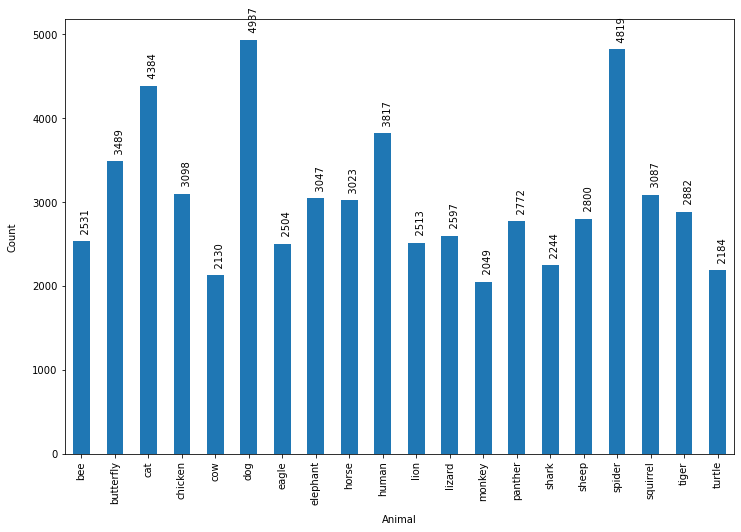

In [9]:
count_animal = df_animals['animal'].value_counts().sort_index()
# plt.rcParams['figure.figsize'] = (20, 7)
plt.xlabel('Animal', labelpad = 10)
plt.ylabel('Count', labelpad = 15)
for index, value in enumerate(count_animal.values):
    plt.text(index, value, '   ' + str(value), rotation = 90)
count_animal.plot.bar()
plt.rcParams['figure.figsize'] = (12, 8)
plt.show()

In [10]:
transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

In [11]:
# Reading Dataset
image_datasets = ImageFolder(root= dir, transform=transform)

In [12]:
train_val_test_weight = [70,10,20]
num_train = int(total*train_val_test_weight[0]/100)
num_valid = int(total*train_val_test_weight[1]/100)
num_test = total - num_train - num_valid
train_ds, valid_ds, test_ds = torch.utils.data.random_split(image_datasets,(num_train, num_valid, num_test))
print(len(train_ds))
print(len(valid_ds))
print(len(test_ds))

42634
6090
12183


In [13]:
num_workers = 0
batch_size = 32

loaders_scratch = {
    'train' : DataLoader(train_ds, shuffle = True, batch_size = batch_size),
    'valid' : DataLoader(valid_ds, shuffle = True, batch_size = batch_size),
    'test' : DataLoader(test_ds, shuffle = True, batch_size = batch_size)    
}

In [14]:
# check if CUDA is available
use_cuda = torch.cuda.is_available()
torch.cuda.is_available()

True

In [15]:
class_names = image_datasets.classes
num_class = len(class_names)
num_class

20

# Model

## *Scratch*

In [16]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer (sees 224 x 224 x 3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # convolutional layer (sees 122 x 122 x 16 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # convolutional layer (sees 56 x 56 x 32 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # convolutional layer (sees 28 x 28 x 64 tensor)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        # convolutional layer (sees 14 x 14 x 128 tensor)
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # dropout layer (p=0.5)
        self.dropout = nn.Dropout(p = 0.5, inplace = True)

        self.conv_bn1 = nn.BatchNorm2d(224,3)
        self.conv_bn2 = nn.BatchNorm2d(16)
        self.conv_bn3 = nn.BatchNorm2d(32)
        self.conv_bn4 = nn.BatchNorm2d(64)
        self.conv_bn5 = nn.BatchNorm2d(128)
        self.conv_bn6 = nn.BatchNorm2d(256)

        # linear layer
        self.fc1 = nn.Linear(256 * 7 * 7, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128,num_class)
        

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.conv_bn2(self.pool(F.relu(self.conv1(x))))
        x = self.conv_bn3(self.pool(F.relu(self.conv2(x))))
        x = self.conv_bn4(self.pool(F.relu(self.conv3(x))))
        x = self.conv_bn5(self.pool(F.relu(self.conv4(x))))
        x = self.conv_bn6(self.pool(F.relu(self.conv5(x))))
        # flatten image input
        x = x.view(-1, 256*7*7)
        # add dropout layer
        x = self.dropout(x)
        # add 4 hidden layers, with relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        # add dropout layer
        x = self.dropout(x)
        # add 5th hidden layer, with relu activation function
        x = self.fc4(x)
        return x

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if torch.cuda.is_available():
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=True)
  (conv_bn1): BatchNorm2d(224, eps=3, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn6):

In [17]:
# specify loss function
criterion_scratch = nn.CrossEntropyLoss()

# specify optimizer
optimizer_scratch = torch.optim.SGD(model_scratch.parameters(), lr=0.001, momentum=0.9)

In [18]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, writer):

    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,'min', factor= 0.3, patience=2, verbose=True)
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        correct = 0
        total = 0
        valid_acc = 0
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            torch.autograd.set_detect_anomaly(True)
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            ## record the average training loss, using something like
            train_loss = train_loss + (1 / (batch_idx + 1)) * (loss.data - train_loss)
            data, target = data.cpu(), target.cpu()


            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss = valid_loss + (1 / (batch_idx + 1)) * (loss.data - valid_loss)
            
            pred_val = output.data.max(1, keepdim=True)[1]
            # compare predictions to true label
            correct += np.sum(np.squeeze(pred_val.eq(target.data.view_as(pred_val))).cpu().numpy())
            total += data.size(0)
            
            data, target = data.cpu(), target.cpu()
        scheduler.step(valid_loss)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        valid_acc = 100 * correct / total
        print('Validation Accuracy: %2d%% (%2d/%2d)' % (valid_acc, correct, total))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
        writer.add_scalar('training loss', train_loss, epoch * len(loaders['train']) + batch_idx)
        writer.add_scalar('validation loss', valid_loss, epoch * len(loaders['valid']) + batch_idx)
        writer.add_scalar('Validation accuracy', 100 * correct / total, epoch)
            
    # return trained model
    return model

In [19]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    if torch.cuda.is_available():
        model.cuda()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predict5ed class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
        
        data, target = data.cpu(), target.cpu()
            
    print('\nTest Loss: {:.6f}'.format(test_loss))

    print('Test Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    model.cpu()

In [20]:
def train_and_test(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, summary_path = 'run/testTensor'):
    writer = SummaryWriter(summary_path)
    model = train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, writer)
    model.load_state_dict(torch.load(save_path))
    test(loaders, model, criterion, use_cuda)

In [21]:
save_path_scratch = 'model_scratch.pt'
model_scratch.load_state_dict(torch.load(save_path_scratch))
n_epochs = 10
train_and_test(n_epochs, loaders_scratch, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, save_path_scratch,'run/Scratch')

Epoch: 1 	Training Loss: 0.305076 	Validation Loss: 0.170619
Validation Accuracy: 95% (5801/6090)
Validation loss decreased (inf --> 0.170619).  Saving model ...
Epoch: 2 	Training Loss: 0.232794 	Validation Loss: 0.181479
Validation Accuracy: 94% (5763/6090)
Epoch: 3 	Training Loss: 0.193188 	Validation Loss: 0.184360
Validation Accuracy: 94% (5752/6090)
Epoch     4: reducing learning rate of group 0 to 3.0000e-04.
Epoch: 4 	Training Loss: 0.160072 	Validation Loss: 0.204787
Validation Accuracy: 94% (5725/6090)
Epoch: 5 	Training Loss: 0.093535 	Validation Loss: 0.155742
Validation Accuracy: 95% (5811/6090)
Validation loss decreased (0.170619 --> 0.155742).  Saving model ...
Epoch: 6 	Training Loss: 0.073112 	Validation Loss: 0.151485
Validation Accuracy: 95% (5826/6090)
Validation loss decreased (0.155742 --> 0.151485).  Saving model ...
Epoch: 7 	Training Loss: 0.064608 	Validation Loss: 0.155977
Validation Accuracy: 95% (5819/6090)
Epoch: 8 	Training Loss: 0.056996 	Validation Loss

## *Mobile Net v3*

In [21]:
model_MobileNetV3 = models.mobilenet_v3_small(pretrained=True)
model_MobileNetV3.classifier[3] = nn.Linear(in_features=1024, out_features=num_class)
# if GPU is available, move the model to GPU
if use_cuda:
     model_MobileNetV3.cuda()
print(model_MobileNetV3)

MobileNetV3(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (relu): ReLU(inplace=True)
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
        )
        (2): ConvBNActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_r

In [23]:
loaders_MobileNetV3 = loaders_scratch
criterion_MobileNetV3 = nn.CrossEntropyLoss()
optimizer_MobileNetV3 = optim.SGD(model_MobileNetV3.parameters(), lr=0.001)
save_path_MobileNetV3 = 'model_MobileNetV3.pt'
n_epochs = 10

train_and_test(n_epochs, loaders_MobileNetV3, model_MobileNetV3, optimizer_MobileNetV3, criterion_MobileNetV3, use_cuda, save_path_MobileNetV3, 'run/MobileNetV3')

Epoch: 1 	Training Loss: 1.670873 	Validation Loss: 0.771353
Validation Accuracy: 86% (5284/6090)
Validation loss decreased (inf --> 0.771353).  Saving model ...
Epoch: 2 	Training Loss: 0.648867 	Validation Loss: 0.433727
Validation Accuracy: 90% (5530/6090)
Validation loss decreased (0.771353 --> 0.433727).  Saving model ...
Epoch: 3 	Training Loss: 0.446769 	Validation Loss: 0.326760
Validation Accuracy: 91% (5596/6090)
Validation loss decreased (0.433727 --> 0.326760).  Saving model ...
Epoch: 4 	Training Loss: 0.360911 	Validation Loss: 0.278327
Validation Accuracy: 92% (5656/6090)
Validation loss decreased (0.326760 --> 0.278327).  Saving model ...
Epoch: 5 	Training Loss: 0.315693 	Validation Loss: 0.241704
Validation Accuracy: 93% (5683/6090)
Validation loss decreased (0.278327 --> 0.241704).  Saving model ...
Epoch: 6 	Training Loss: 0.284064 	Validation Loss: 0.222297
Validation Accuracy: 93% (5709/6090)
Validation loss decreased (0.241704 --> 0.222297).  Saving model ...
Epo

In [24]:
%tensorboard --logdir=run

In [37]:
### TODO: Write a function that takes a path to an image as input
### and returns the animal that is predicted by the model.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torch.autograd import Variable
import random
import re

# create a list with a class names
class_names = image_datasets.classes
class_names = [re.sub("\d{3}.", "", item) for item in class_names]
class_names = [re.sub("_", " ", item) for item in class_names]

def predict_breed_transfer(img, model):
    
    img_ts = img[0]
    img_ts.unsqueeze_(0)  # Insert the new axis at index 0 i.e. in front of the other axes/dims.
    img_ts = Variable(img_ts) #The input to the network needs to be an autograd Variable

    if use_cuda:
        model.cuda()
        img_ts = Variable(img_ts.cuda())

    model.eval()
    output = model(img_ts) # Returns a Tensor of shape (batch, num class labels)
    output = output.cpu()

    # Our prediction will be the index of the class label with the largest value.
    predict_index = output.data.numpy().argmax()
    true_index = img[1]

    predicted_breed = class_names[predict_index]
    true_breed = class_names[true_index]
    model.cpu()
    return (predicted_breed,true_breed)


In [38]:
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.255]
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: spider
VGG16: spider
ResNet34: spider
AlexNet: spider
SqueezeNet: spider
Finetuned SqueezeNet: spider
True Animal: spider


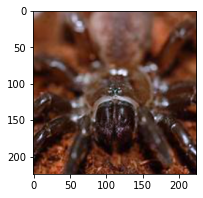

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: bee
VGG16: bee
ResNet34: bee
AlexNet: bee
SqueezeNet: bee
Finetuned SqueezeNet: bee
True Animal: bee


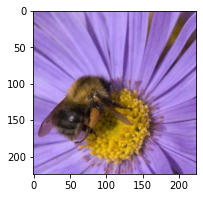

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: lizard
VGG16: panther
ResNet34: lizard
AlexNet: lizard
SqueezeNet: lizard
Finetuned SqueezeNet: lizard
True Animal: lizard


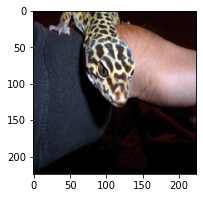

Scratch: bee
VGG16: bee
ResNet34: bee
AlexNet: bee
SqueezeNet: bee
Finetuned SqueezeNet: bee
True Animal: bee


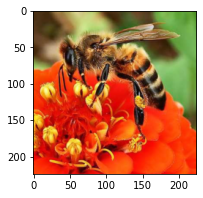

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: lion
VGG16: lion
ResNet34: lion
AlexNet: lion
SqueezeNet: lion
Finetuned SqueezeNet: lion
True Animal: lion


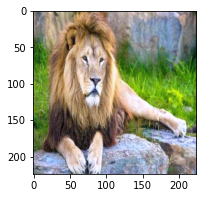

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: chicken
VGG16: chicken
ResNet34: chicken
AlexNet: chicken
SqueezeNet: chicken
Finetuned SqueezeNet: chicken
True Animal: chicken


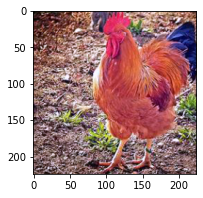

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: spider
VGG16: spider
ResNet34: spider
AlexNet: spider
SqueezeNet: spider
Finetuned SqueezeNet: spider
True Animal: spider


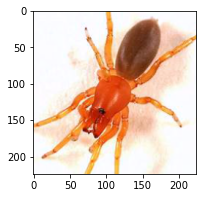

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: sheep
VGG16: sheep
ResNet34: sheep
AlexNet: sheep
SqueezeNet: sheep
Finetuned SqueezeNet: sheep
True Animal: sheep


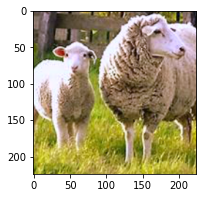

Scratch: elephant
VGG16: elephant
ResNet34: elephant
AlexNet: elephant
SqueezeNet: elephant
Finetuned SqueezeNet: elephant
True Animal: elephant


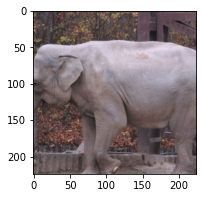

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: chicken
VGG16: chicken
ResNet34: chicken
AlexNet: chicken
SqueezeNet: chicken
Finetuned SqueezeNet: chicken
True Animal: chicken


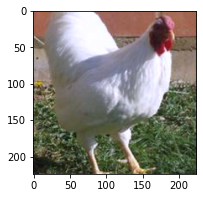

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: shark
VGG16: shark
ResNet34: shark
AlexNet: shark
SqueezeNet: shark
Finetuned SqueezeNet: shark
True Animal: shark


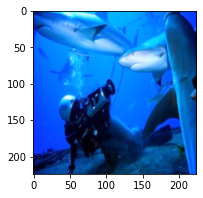

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: dog
VGG16: cow
ResNet34: cow
AlexNet: cow
SqueezeNet: cow
Finetuned SqueezeNet: cow
True Animal: cow


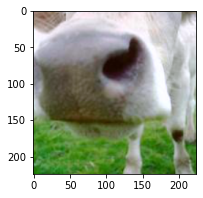

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: eagle
VGG16: eagle
ResNet34: eagle
AlexNet: eagle
SqueezeNet: eagle
Finetuned SqueezeNet: eagle
True Animal: eagle


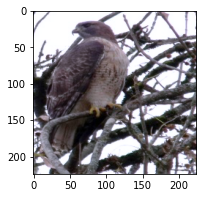

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: spider
VGG16: spider
ResNet34: spider
AlexNet: spider
SqueezeNet: spider
Finetuned SqueezeNet: spider
True Animal: spider


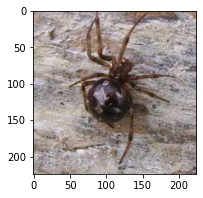

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: bee
VGG16: bee
ResNet34: bee
AlexNet: bee
SqueezeNet: bee
Finetuned SqueezeNet: bee
True Animal: bee


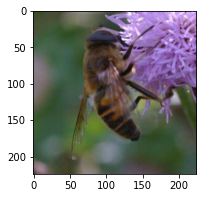

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: shark
VGG16: shark
ResNet34: shark
AlexNet: shark
SqueezeNet: shark
Finetuned SqueezeNet: shark
True Animal: shark


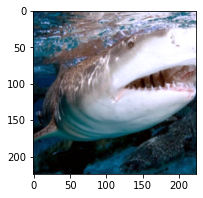

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: sheep
VGG16: sheep
ResNet34: sheep
AlexNet: sheep
SqueezeNet: sheep
Finetuned SqueezeNet: sheep
True Animal: sheep


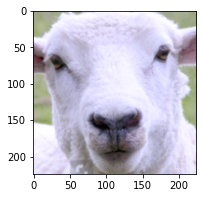

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: butterfly
VGG16: butterfly
ResNet34: butterfly
AlexNet: butterfly
SqueezeNet: butterfly
Finetuned SqueezeNet: butterfly
True Animal: butterfly


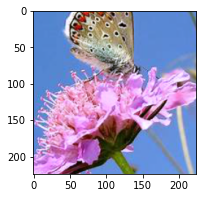

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: spider
VGG16: butterfly
ResNet34: butterfly
AlexNet: butterfly
SqueezeNet: butterfly
Finetuned SqueezeNet: butterfly
True Animal: butterfly


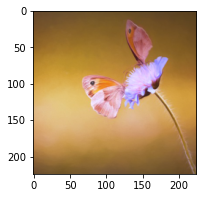

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: lizard
VGG16: lizard
ResNet34: lizard
AlexNet: lizard
SqueezeNet: lizard
Finetuned SqueezeNet: lizard
True Animal: lizard


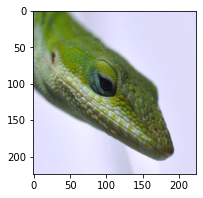

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: elephant
VGG16: elephant
ResNet34: elephant
AlexNet: elephant
SqueezeNet: elephant
Finetuned SqueezeNet: elephant
True Animal: elephant


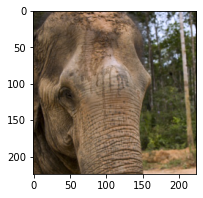

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: shark
VGG16: shark
ResNet34: shark
AlexNet: shark
SqueezeNet: shark
Finetuned SqueezeNet: shark
True Animal: shark


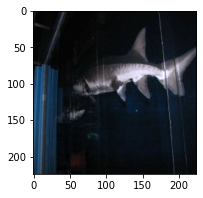

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: sheep
VGG16: sheep
ResNet34: sheep
AlexNet: sheep
SqueezeNet: sheep
Finetuned SqueezeNet: sheep
True Animal: sheep


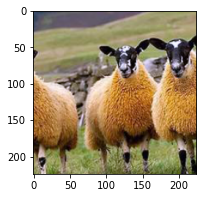

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: chicken
VGG16: chicken
ResNet34: chicken
AlexNet: chicken
SqueezeNet: chicken
Finetuned SqueezeNet: chicken
True Animal: chicken


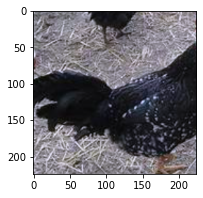

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: horse
VGG16: horse
ResNet34: horse
AlexNet: horse
SqueezeNet: horse
Finetuned SqueezeNet: horse
True Animal: horse


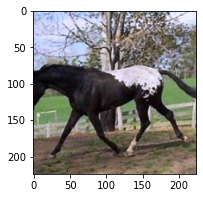

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: cow
VGG16: cow
ResNet34: cow
AlexNet: cow
SqueezeNet: cow
Finetuned SqueezeNet: cow
True Animal: cow


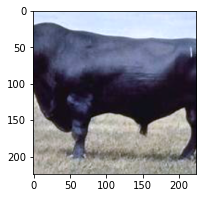

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: chicken
VGG16: chicken
ResNet34: chicken
AlexNet: chicken
SqueezeNet: chicken
Finetuned SqueezeNet: chicken
True Animal: chicken


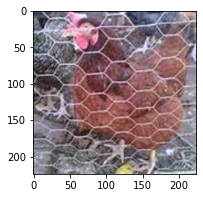

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: elephant
VGG16: elephant
ResNet34: elephant
AlexNet: elephant
SqueezeNet: elephant
Finetuned SqueezeNet: elephant
True Animal: elephant


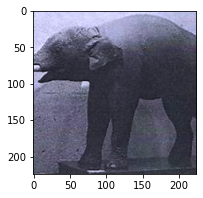

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: elephant
VGG16: elephant
ResNet34: elephant
AlexNet: elephant
SqueezeNet: elephant
Finetuned SqueezeNet: elephant
True Animal: elephant


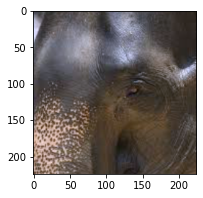

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: dog
VGG16: dog
ResNet34: dog
AlexNet: dog
SqueezeNet: dog
Finetuned SqueezeNet: dog
True Animal: dog


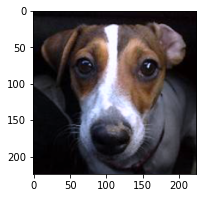

Scratch: turtle
VGG16: turtle
ResNet34: turtle
AlexNet: turtle
SqueezeNet: turtle
Finetuned SqueezeNet: turtle
True Animal: turtle


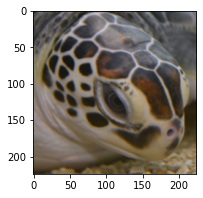

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: horse
VGG16: horse
ResNet34: horse
AlexNet: horse
SqueezeNet: horse
Finetuned SqueezeNet: horse
True Animal: horse


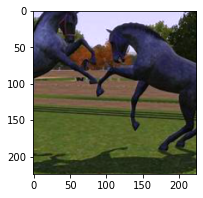

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: horse
VGG16: horse
ResNet34: horse
AlexNet: horse
SqueezeNet: horse
Finetuned SqueezeNet: horse
True Animal: horse


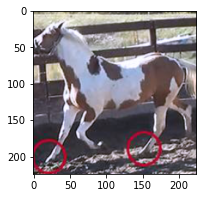

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: eagle
VGG16: eagle
ResNet34: eagle
AlexNet: eagle
SqueezeNet: eagle
Finetuned SqueezeNet: eagle
True Animal: eagle


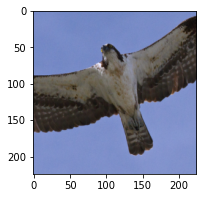

Scratch: spider
VGG16: spider
ResNet34: spider
AlexNet: spider
SqueezeNet: spider
Finetuned SqueezeNet: spider
True Animal: spider


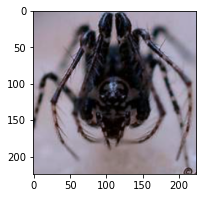

Scratch: spider
VGG16: spider
ResNet34: spider
AlexNet: spider
SqueezeNet: spider
Finetuned SqueezeNet: spider
True Animal: spider


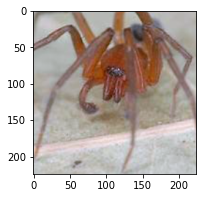

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: chicken
VGG16: chicken
ResNet34: chicken
AlexNet: chicken
SqueezeNet: chicken
Finetuned SqueezeNet: chicken
True Animal: chicken


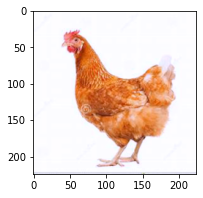

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: elephant
VGG16: elephant
ResNet34: elephant
AlexNet: elephant
SqueezeNet: elephant
Finetuned SqueezeNet: elephant
True Animal: elephant


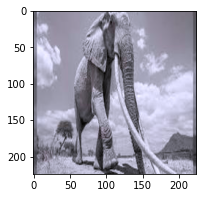

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: cow
VGG16: chicken
ResNet34: cow
AlexNet: cow
SqueezeNet: cow
Finetuned SqueezeNet: cow
True Animal: cow


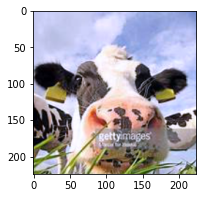

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Scratch: monkey
VGG16: monkey
ResNet34: monkey
AlexNet: monkey
SqueezeNet: cat
Finetuned SqueezeNet: cat
True Animal: monkey


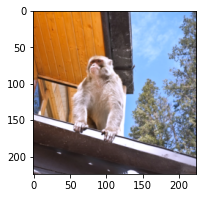

In [77]:
ind_lst = [i for i in range(num_test)]
np.random.shuffle(ind_lst)
for i in range(40):
    
    predict_scratch, true = predict_breed_transfer(test_ds[ind_lst[i]], model_scratch)
    predict_VGG16 = predict_breed_transfer(test_ds[ind_lst[i]], model_VGG16)[0]
    predict_ResNet = predict_breed_transfer(test_ds[ind_lst[i]], model_ResNet)[0]
    predict_AlexNet = predict_breed_transfer(test_ds[ind_lst[i]], model_AlexNet)[0]
    predict_SqueezeNet = predict_breed_transfer(test_ds[ind_lst[i]], model_Squeeze)[0]
    predict_finetune_Squeeze = predict_breed_transfer(test_ds[ind_lst[i]], model_fineTune_squeezeNet)[0]
    
    print('Scratch:', predict_scratch)
    print('VGG16:',predict_VGG16)
    print('ResNet34:',predict_ResNet)
    print('AlexNet:',predict_ResNet)
    print('SqueezeNet:',predict_SqueezeNet)
    print('Finetuned SqueezeNet:',predict_finetune_Squeeze)
    print('======================')
    print('True Animal:',true)
    
    img = np.transpose(inv_normalize(test_ds[ind_lst[i]][0]), (1, 2, 0))
    img = np.array(img, dtype = 'float')
    plt.rcParams['figure.figsize'] = (3, 3)
    plt.imshow(img)
    plt.show()

In [40]:
from sklearn.metrics import confusion_matrix

def confusion(model):
    y_predict = []
    y_true = []
    for i in range(num_test):
        predict_scratch, true = predict_breed_transfer(test_ds[ind_lst[i]], model)
        y_predict.append(predict_scratch)
        y_true.append(true)
    cf_matrix = confusion_matrix(y_true, y_predict)
    return cf_matrix

In [59]:
import seaborn as sns
def sketch_confusion(cf_matrix):
    class_names = image_datasets.classes
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(class_names)
    ax.yaxis.set_ticklabels(class_names)
    ## Display the visualization of the Confusion Matrix.
    plt.rcParams['figure.figsize'] = (20, 20)
    plt.show()

In [42]:
cf_matrix = confusion(model_ResNet)  


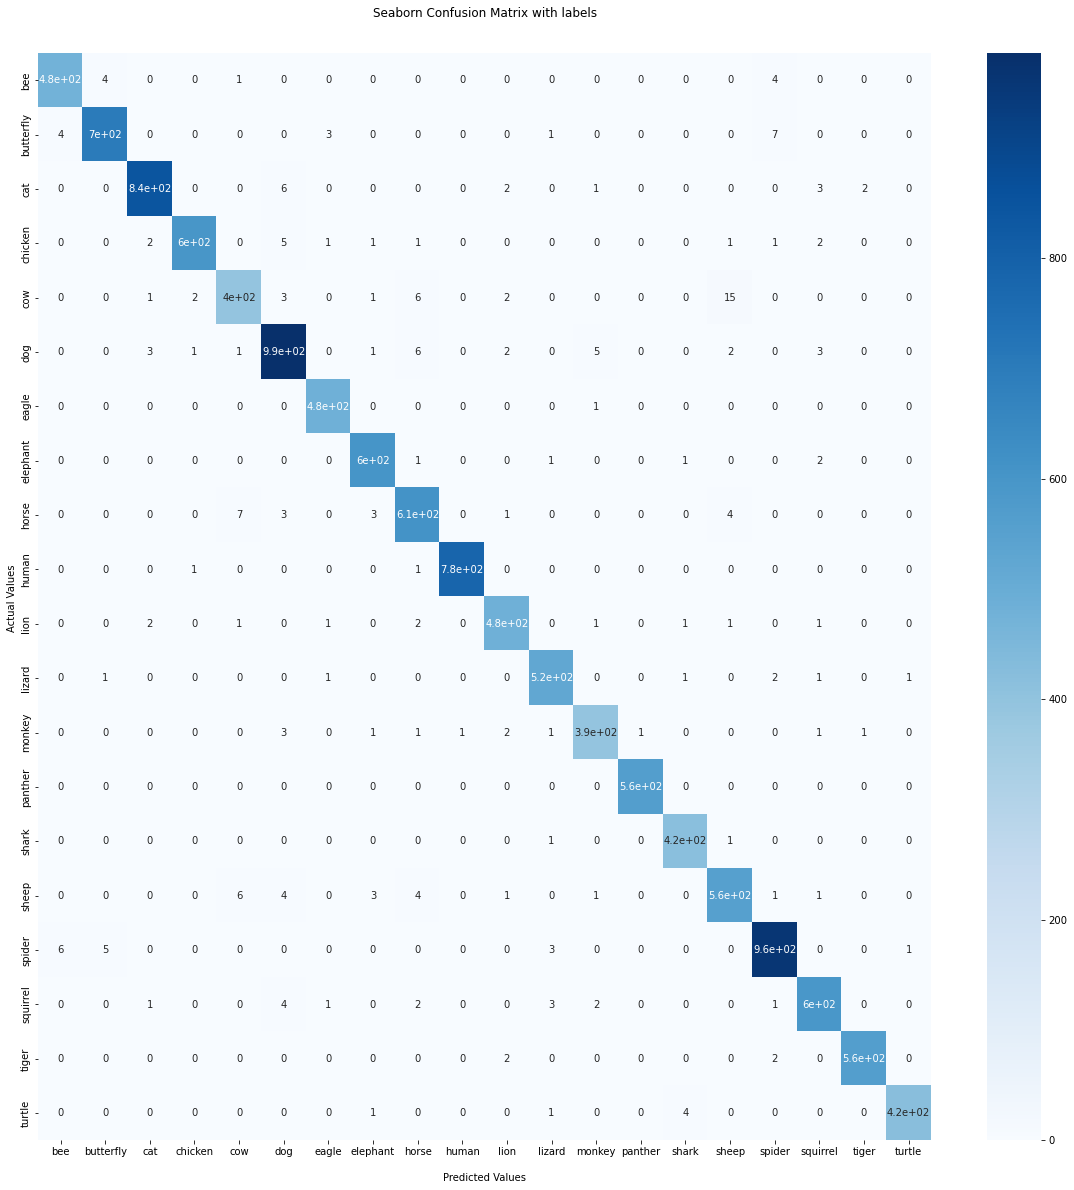

In [60]:
sketch_confusion(cf_matrix)